# Plot generation
### Plots for the LSTM_HC with my classsifiers

In [1]:
from scorers import scorer
import seaborn as sns
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from gym_PGFS.scorers.scorer import GuacamolMGenFailScorer
from gym_PGFS.valuation.plot_utils import plot_medians, process_output_into_dataframe

In [2]:
import os
os.chdir('../')
os.getcwd()

'/home/boto/chemPGFS/gymPGFS'

In [3]:
dsets = ['CHEMBL3888429', 'CHEMBL1909140', 'CHEMBL1909203']

In [4]:
outcomes = {}

for dset in dsets:
    with open(f"./data/lstm_hc/list_result_{dset}.pkl", "rb") as f:
        outcomes[dset] = pickle.load(f)
        print(len(outcomes[dset]))

151
151
151


In [6]:
# iterate over the lists, convert them to dataframes
outcome_dfs = {}
for name, dset in outcomes.items():
    
    scoring = GuacamolMGenFailScorer(mgenfail_data_prefix='./data/mgenfail_assays',
                                     fingerprints_used='ECFP_2_1024',
                                     name=name)

    outcome_dfs[name] = process_output_into_dataframe(dset, scoring)
    
    # save the resulting dataframe to csv
    outcome_dfs[name].to_csv(f"./data/lstm_hc/{name}_outcome.csv")
    
    # basic sanity check
    print(len(outcome_dfs[name]))

# keep the memory clean
del(outcomes)

151it [01:25,  1.77it/s]
0it [00:00, ?it/s]

275721


151it [01:38,  1.53it/s]
0it [00:00, ?it/s]

256593


151it [01:59,  1.27it/s]


261615


In [4]:
# use this block to skip preprocessing

outcome_dfs = {}

for name in dsets:
    outcome_dfs[name] = pd.read_csv(f"./data/lstm_hc/{name}_outcome.csv")

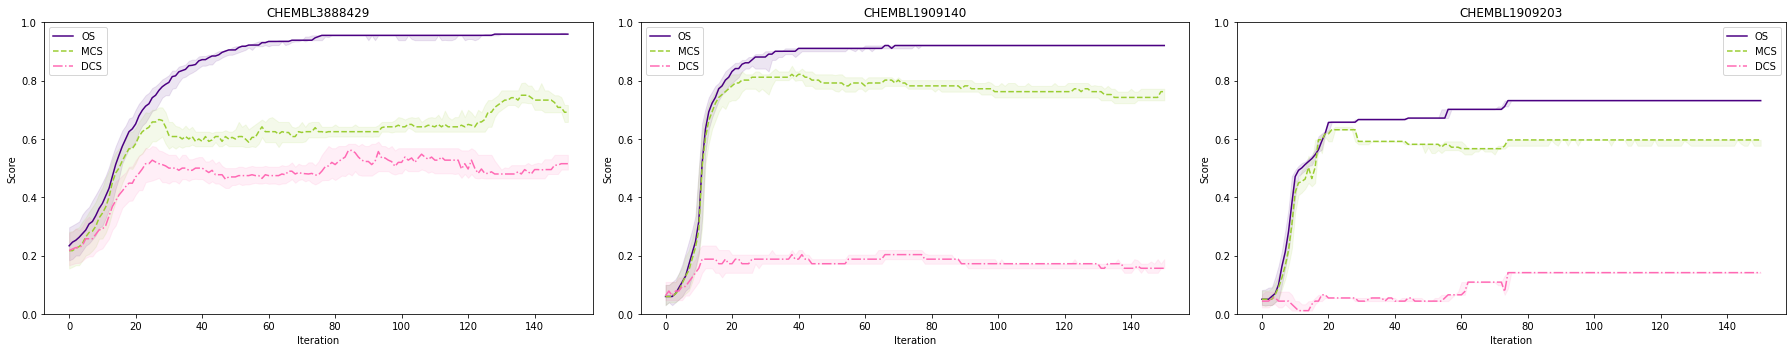

In [5]:
# make a plot
fig, axs = plt.subplots(1,3,figsize=(25,5))

for (name, data), (i, ax) in zip(outcome_dfs.items(), enumerate(axs)):
    plot_medians(data, 
                 ax,
                 (0, i),
                 name,
                 'Score',
                 'Iteration',
                 y_scale = (0.,1.),
                 x_scale = None
                )
plt.tight_layout()

### Similar line plots for the outcomes of the PGFS model.

In [1]:
from scorers import scorer
import seaborn as sns
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from gym_PGFS.scorers.scorer import GuacamolMGenFailScorer
from gym_PGFS.valuation.plot_utils import plot_medians, process_PGFS_output_into_dataset

In [2]:
import os
os.chdir('../')
os.getcwd()

'/home/boto/chemPGFS/gymPGFS'

In [3]:
run_dirs = {'./data/run_B': 'CHEMBL3888429', 
            './data/run_A': 'CHEMBL1909140', 
            './data/run_C': 'CHEMBL1909203'}

In [5]:
outcomes = {}

for location, name in run_dirs.items():
    # load the pickle
    with open(f"{location}/smiles_collected.pkl", "rb") as f:
        outcomes[name] = pickle.load(f)
        print(len(outcomes[name]))
    
    # fire up the scorer
    scoring = GuacamolMGenFailScorer(mgenfail_data_prefix='./data/mgenfail_assays',
                                 fingerprints_used='ECFP_2_1024',
                                 name=name)

    # convert into dataframe
    outcomes[name] = process_PGFS_output_into_dataset(outcomes[name], scoring)
        
    # save the dataframe as csv for future use
    outcomes[name].to_csv(f"{location}/smiles_collected.csv")
    
    print(len(outcomes[name]))

  0%|          | 0/21 [00:00<?, ?it/s]

21


  0%|          | 0/51 [00:00<?, ?it/s]

37800
51


  0%|          | 0/51 [00:00<?, ?it/s]

91800
51


100%|██████████| 51/51 [01:32<00:00,  1.81s/it]


91800


In [38]:
outcomes['CHEMBL1909140'][['epoch', 'type', 'value']]['epoch'].unique()

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000,
       27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000,
       36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000,
       45000, 46000, 47000, 48000, 49000, 50000])

In [37]:
# use this block to skip preprocessing

outcomes = {}

for location, name in run_dirs.items():
    df = pd.read_csv(f"{location}/smiles_collected.csv")
    print(len(df))
    print(df['step'].unique())
    print("Picking 5")
    df = df[df['step']==5].reset_index().drop('index', 1)[['epoch', 'type', 'value']].sort_values(by=['epoch', 'type'])
    outcomes[name] = df

    

37800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5


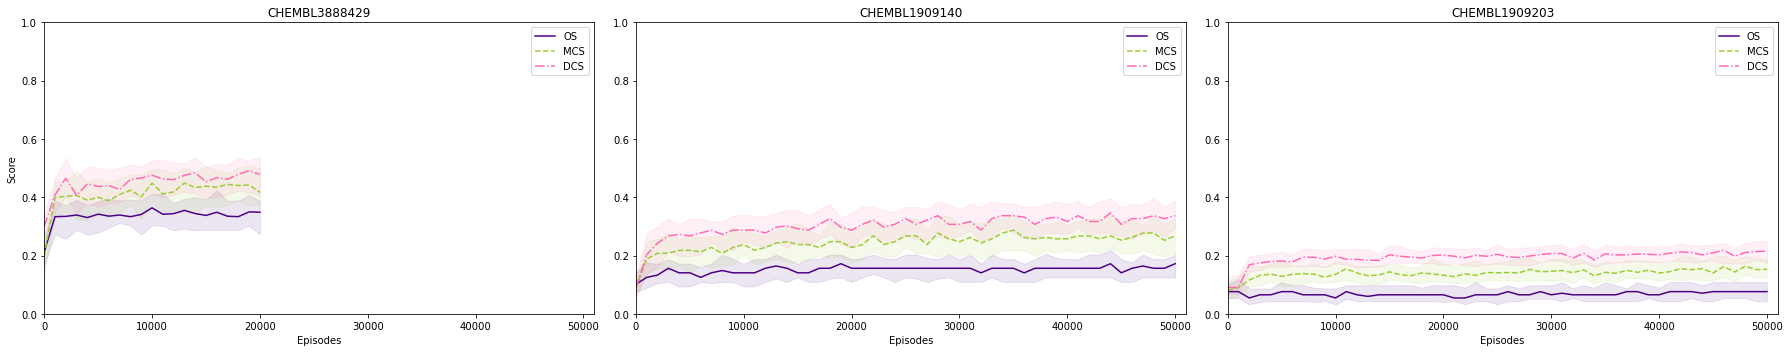

In [40]:
# make a plot
fig, axs = plt.subplots(1,3,figsize=(25,5))

for (name, data), (i, ax) in zip(outcomes.items(), enumerate(axs)):
    plot_medians(data, 
                 ax,
                 (0, i),
                 name,
                 'Score',
                 'Episodes',
                 y_scale = (0.,1.),
                 x_scale = (0.,  51000.)
                )
plt.tight_layout()

In [41]:
# check the baseline: average of molecules in the reactants dataset
with open('./data/run_A/preprocessed/reactants_processed.pkl', 'rb') as f:
    reactants = pickle.load(f)
reactants.head()    

,smiles,n_heavy,react_0_0,react_1_0,react_1_1,react_2_0,react_2_1,react_3_0,react_3_1,react_4_0,...,react_59_0,react_60_0,react_61_0,react_62_0,ECFP_2_1024,ECFP_2_512,ECFP_2_256,ECFP_2_128,MolD,n_templates
0,C[Si](C)(C)C#Cc1cc(Br)cnc1O,14,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[9.41278376165281, -1.395623425296044, 0.00097...",10
1,FC(F)(F)c1ccc(C#CCBr)cc1,14,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[12.12805894116906, -4.276407194822373, 0.5079...",7
2,CC(C)[Si](C#CBr)(C(C)C)C(C)C,13,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3.5, -1.435570987654321, 0.7338425925925924, ...",7
3,CC(C)C(Br)C(=O)C#C[Si](C)(C)C,13,False,False,False,False,False,False,False,False,...,True,True,False,False,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[11.432893518518519, -1.403403722600151, 0.011...",11
4,CC[Si](C#CC1(Br)CC1)(CC)CC,13,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[3.678487811791383, -1.1783024691358024, 0.240...",7


In [42]:
# fire up the scorer
scoring = GuacamolMGenFailScorer(mgenfail_data_prefix='./data/mgenfail_assays',
                             fingerprints_used='ECFP_2_1024',
                             name='CHEMBL1909140')

In [44]:
scores = scoring.raw_score_list(reactants['smiles'].tolist())
len(scores)

92409

In [47]:
import numpy as np
scores = np.array(scores)

In [53]:
np.quantile(scores, [0.25, 0.5, 0.75])

array([0.00990099, 0.01980198, 0.03960396])